<a href="https://colab.research.google.com/github/Forrestjohnson2000/Sea-Breeze-and-Shark-Analysis/blob/main/Sea_Breeze_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Breeze K-Means Clustering


We are using an unsupervised method, k-means clustering, to examine whether there are significant clusters in the sea breeze data.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#import dataset
df = pd.read_csv("https://raw.githubusercontent.com/Forrestjohnson2000/6162-Seabreeze/main/Data/prepped_data.csv")

The next steps are examining and preparing the data for clustering.

In [4]:
df.head()

,Unnamed: 0,date,hour,drct,sped,WDIR,WSPD,PRES,WTMP,SBI,AttackCat
0,1,2013-01-02,14.0,67.5,8.0500,250.0,4.0,1017.408303,21.836225,4.547025,0.0
1,2,2013-01-03,14.0,22.5,2.0125,80.0,5.0,1017.408303,21.836225,6.092861,0.0
2,3,2013-01-05,14.0,25.0,8.3375,50.0,6.0,1017.408303,21.836225,7.273592,0.0
3,4,2013-01-06,14.0,0.0,0.0000,350.0,5.0,1017.408303,21.836225,5.821537,0.0
4,5,2013-01-07,14.0,25.0,9.4875,50.0,8.0,1017.408303,21.836225,6.718124,0.0


First, we can drop the categorical and other irrelevant variables.

In [5]:
df1 = df.drop(["Unnamed: 0", "date","hour"], axis=1)

#dfstack = df1.groupby(["date","hour"]).mean()
#dfstack.info()

df1

,drct,sped,WDIR,WSPD,PRES,WTMP,SBI,AttackCat
0,67.500000,8.0500,250.0,4.0,1017.408303,21.836225,4.547025,0.0
1,22.500000,2.0125,80.0,5.0,1017.408303,21.836225,6.092861,0.0
2,25.000000,8.3375,50.0,6.0,1017.408303,21.836225,7.273592,0.0
3,0.000000,0.0000,350.0,5.0,1017.408303,21.836225,5.821537,0.0
4,25.000000,9.4875,50.0,8.0,1017.408303,21.836225,6.718124,0.0
...,...,...,...,...,...,...,...,...
3166,32.500000,6.3250,38.0,6.6,1032.100000,13.900000,4.738069,0.0
3167,250.000000,11.7875,269.0,0.8,1025.500000,13.900000,3.090149,0.0
3168,48.792615,6.3250,270.0,1.8,1021.500000,14.400000,5.244294,0.0
3169,222.500000,12.3625,225.0,8.3,1012.900000,14.300000,3.314484,0.0


In [6]:
df1.describe()

,drct,sped,WDIR,WSPD,PRES,WTMP,SBI,AttackCat
count,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,162.933925,8.198853,162.994217,5.340904,1018.749308,22.293673,3.791947,0.029959
std,92.089884,3.500473,112.206170,2.690690,4.876092,2.795952,2.168168,0.170501
min,0.000000,0.000000,0.000000,0.000000,997.100000,12.800000,-0.389268,0.000000
25%,84.166667,6.037500,50.000000,3.000000,1016.700000,21.836225,1.807751,0.000000
50%,172.500000,8.050000,180.000000,5.000000,1017.408303,21.836225,3.582850,0.000000
75%,232.500000,10.350000,257.500000,7.000000,1021.300000,21.836225,5.518611,0.000000
max,360.000000,41.400000,360.000000,18.900000,1035.200000,30.900000,9.381775,1.000000


Next we perform a correlation matrix to see how the variables are related to one another. Although **WDIR** and **drct** as well as **WSPD** and **sped** have a greater than 0.5 correlation. It is important to keep them both in the analysis as they represent the conditions on the sea and the land respectively.

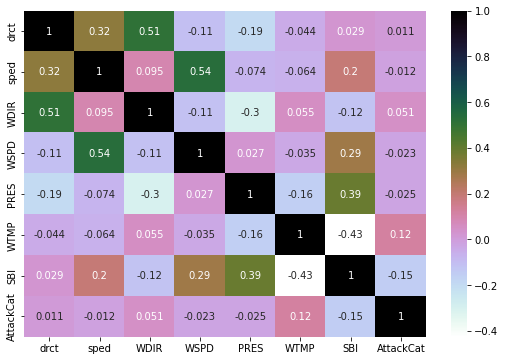

In [7]:
import seaborn as sns

plt.figure(figsize=(9,6))
sns.heatmap(df1.corr(),annot=True,cmap='cubehelix_r')
plt.show()

While kmeans clustering doesn't need to be split into train and test, it is still important to remove the dependent variable **AttackCat** so we can perform unsupervised modelling uninfluenced by our target.

In [8]:
X = df1.drop(columns = "AttackCat")
y = df1.AttackCat

X

,drct,sped,WDIR,WSPD,PRES,WTMP,SBI
0,67.500000,8.0500,250.0,4.0,1017.408303,21.836225,4.547025
1,22.500000,2.0125,80.0,5.0,1017.408303,21.836225,6.092861
2,25.000000,8.3375,50.0,6.0,1017.408303,21.836225,7.273592
3,0.000000,0.0000,350.0,5.0,1017.408303,21.836225,5.821537
4,25.000000,9.4875,50.0,8.0,1017.408303,21.836225,6.718124
...,...,...,...,...,...,...,...
3166,32.500000,6.3250,38.0,6.6,1032.100000,13.900000,4.738069
3167,250.000000,11.7875,269.0,0.8,1025.500000,13.900000,3.090149
3168,48.792615,6.3250,270.0,1.8,1021.500000,14.400000,5.244294
3169,222.500000,12.3625,225.0,8.3,1012.900000,14.300000,3.314484


In [9]:
X.columns

Index(['drct', 'sped', 'WDIR', 'WSPD', 'PRES', 'WTMP', 'SBI'], dtype='object')

We normalize the dataset for this clustering method using MinMaxScaler, which scales and normalizes the data, making it ready to analyze.

In [10]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
normal_data = pd.DataFrame(
    norm.fit_transform(X))
normal_data


,0,1,2,3,4,5,6
0,0.187500,0.194444,0.694444,0.211640,0.533026,0.499239,0.505196
1,0.062500,0.048611,0.222222,0.264550,0.533026,0.499239,0.663402
2,0.069444,0.201389,0.138889,0.317460,0.533026,0.499239,0.784242
3,0.000000,0.000000,0.972222,0.264550,0.533026,0.499239,0.635634
4,0.069444,0.229167,0.138889,0.423280,0.533026,0.499239,0.727393
...,...,...,...,...,...,...,...
3166,0.090278,0.152778,0.105556,0.349206,0.918635,0.060773,0.524748
3167,0.694444,0.284722,0.747222,0.042328,0.745407,0.060773,0.356095
3168,0.135535,0.152778,0.750000,0.095238,0.640420,0.088398,0.576557
3169,0.618056,0.298611,0.625000,0.439153,0.414698,0.082873,0.379054


### Modelling

Next we start the kmeans analysis on the normalized data using multiple numbers of clusters in order to measure the silohuette score and intertia/distortion of clusters based on how many there were. Silohuette score measures how separated the data point in each cluster are from one another. The higher the score the better the kmeans using that number of clusters performed. Intertia/distortion measures the distances and or separation of the data points within the clusters so having a lower inertia is better.

We use the visualization of distortion to help us determine the numbers of clusters to use for the KMeans algorithm.

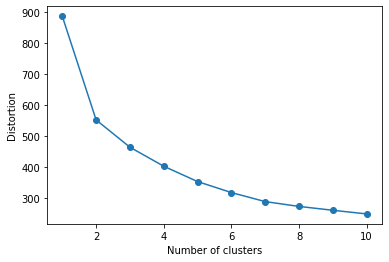

In [11]:
#import library
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, #init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(normal_data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Next we add a silohuette score visualization as well which tells how much separation there is between clusters. A higher score indicates more separation.

In [12]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, init='random',
                       n_init=10, max_iter=300,
                       tol=1e-04,random_state=42).fit(normal_data)
                for k in range(1, 12)]

silhouette_scores = [silhouette_score(normal_data, model.labels_)
                     for model in kmeans_per_k[1:]]

silhouette_scores

[0.34636627627287075,
 0.28178057663751727,
 0.24071327877250315,
 0.25472917968505326,
 0.25719900347377217,
 0.2675509520454855,
 0.2509998291045853,
 0.23621938925111347,
 0.2264012047274199,
 0.21019487823709898]

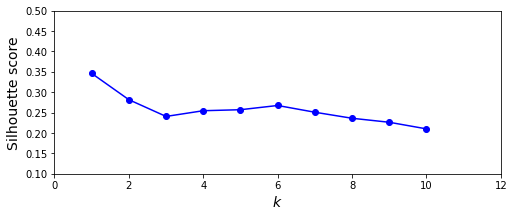

In [13]:
#Plotting the scores for each number of calculated Kmeans clusters

plt.figure(figsize=(8, 3))
plt.plot(range(1,11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0, 12, 0.1, .5])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

Although 2 clusters seems to have the highest score (ignoring kmeans with 1 cluster), the kmeans with 6 clusters performed almost as well and has a lower inertia than 2 clusters. Although the scores overall aren't high, this is expected due to the variability of weather and inability to capture all input variables.

Next we fit the KMeans algorithm to datasets on 6 clusters.

In [14]:
km = KMeans(
    n_clusters=6, random_state=0
)
km.fit_predict(normal_data)
df_km = km.fit_predict(normal_data)

In [15]:
labels = km.labels_

cluster_data = df1
cluster_data['cluster_num'] = labels
cluster_data.head()

,drct,sped,WDIR,WSPD,PRES,WTMP,SBI,AttackCat,cluster_num
0,67.5,8.0500,250.0,4.0,1017.408303,21.836225,4.547025,0.0,0
1,22.5,2.0125,80.0,5.0,1017.408303,21.836225,6.092861,0.0,1
2,25.0,8.3375,50.0,6.0,1017.408303,21.836225,7.273592,0.0,1
3,0.0,0.0000,350.0,5.0,1017.408303,21.836225,5.821537,0.0,0
4,25.0,9.4875,50.0,8.0,1017.408303,21.836225,6.718124,0.0,1


### Evaluation

The next step is to evaluate the clusters. First we group the data by clusters so we can extract information on the weather patterns described in each cluster. Specifically which cluster has the most shark attacks within it.

In [16]:
cluster_sum = cluster_data.groupby('cluster_num').sum()

cluster_sum.AttackCat

cluster_num
0    43.0
1     6.0
2     1.0
3    16.0
4     4.0
5    25.0
Name: AttackCat, dtype: float64

Using a bar graph we show the number of values that are within each cluster so we have an idea of the proportion and significance of clusters and their values.

Cluster 0 seems to have the most data points followed by cluster 3. The cluster with the least is cluster 5.

Text(0, 0.5, 'Frequency')

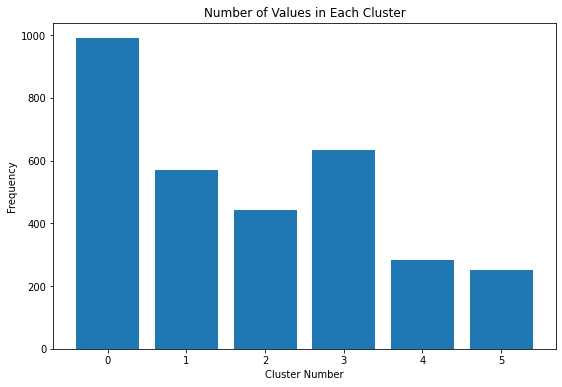

In [17]:
cluster_counts = pd.DataFrame(cluster_data.cluster_num.value_counts())

plt.figure(figsize = (9,6))
plt.bar(cluster_counts.index, cluster_counts.cluster_num)

plt.title("Number of Values in Each Cluster")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")

Grouping by clusters on the average, we get the following results:

In [18]:
#Group by the clusters
clusters = cluster_data.groupby('cluster_num').mean()
cluster_data.groupby('cluster_num').mean()


,drct,sped,WDIR,WSPD,PRES,WTMP,SBI,AttackCat
cluster_num,,,,,,,,
0,186.400353,7.910605,243.758586,4.352103,1017.172533,21.541642,2.717496,0.043434
1,65.627090,8.668792,49.329247,7.497198,1023.435312,21.043064,6.003703,0.010508
2,277.371553,10.545390,306.611738,6.333183,1017.588162,21.280633,5.993100,0.002257
3,87.048843,6.734884,67.617089,4.923389,1017.831257,23.018826,2.551294,0.025316
4,249.046362,8.133906,34.299296,4.343310,1019.822088,21.568677,4.814811,0.014085
5,183.404088,7.884857,235.309407,4.764314,1017.455378,28.887251,1.079921,0.099602


Here are the clusters sorted by the mean **AttackCat** so we can see what clusters have the most common percentage of shark attacks.

In [19]:
cluster_sort = clusters.sort_values("AttackCat", ascending = False)
clusters.sort_values("AttackCat", ascending = False)

,drct,sped,WDIR,WSPD,PRES,WTMP,SBI,AttackCat
cluster_num,,,,,,,,
5,183.404088,7.884857,235.309407,4.764314,1017.455378,28.887251,1.079921,0.099602
0,186.400353,7.910605,243.758586,4.352103,1017.172533,21.541642,2.717496,0.043434
3,87.048843,6.734884,67.617089,4.923389,1017.831257,23.018826,2.551294,0.025316
4,249.046362,8.133906,34.299296,4.343310,1019.822088,21.568677,4.814811,0.014085
1,65.627090,8.668792,49.329247,7.497198,1023.435312,21.043064,6.003703,0.010508
2,277.371553,10.545390,306.611738,6.333183,1017.588162,21.280633,5.993100,0.002257


A few notable results from these clusters:
1. The cluster with the highest proportion of shark attacks has the lowest SBI, indicating that the higher liklihood of a seabreeze and shark attacks correspond.
3. Higher **SBI** corresponds to lower **AttackCat** which reaffirms our hypothesis of sea breeze increasing liklihood of shark presence.
2. Seaward wind direction (**WDIR**) varies between 2 extremes in the clusters. around 250 and around 50 degrees from North.
3. **PRES** remains mostly the same between clusters indicating that it doesn't have much impact in this model.


In [20]:
#This is the baseline of the percentage of shark attacks 
#Proportion of shark attacks that occurred over the 3 year period from 2013 to the end of 2016
baseline = df1.AttackCat[df1.AttackCat == 1].count()/df1.AttackCat.count()
baseline = baseline.round(5)

print(baseline)


0.02996


To examine this further we created a scatterplot with probability of shark attacks and **SBI** while also measuring wind direction and grouped by cluster. When comparing to the baseline of shark attacks across the entire data, we see that a lower SBI is indicative of more attacks.

The one point the doesn't follow this has a very different wind direction than the other clusters above the baseline. This indicates wind direction also plays a significant role in shark attack frequency which is reinforced by the dependence wind direction running perpendicular to the coast to create a strong sea breeze.

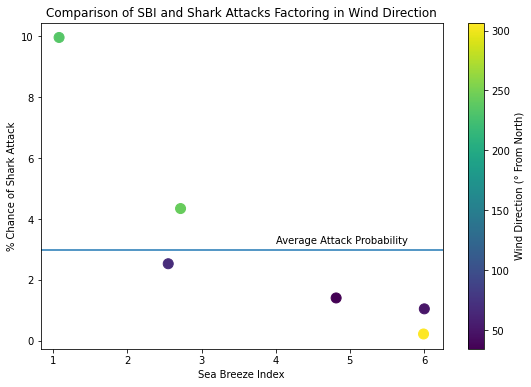

In [21]:
plt.figure(figsize=(9,6))
plt.scatter(cluster_sort.SBI, cluster_sort.AttackCat*100, c = cluster_sort.WDIR, s = 100)

shark_baseline = y.mean()*100
plt.axhline(shark_baseline)
plt.text(4,shark_baseline + .2, "Average Attack Probability")

plt.title("Comparison of SBI and Shark Attacks Factoring in Wind Direction")
plt.xlabel("Sea Breeze Index")
plt.ylabel("% Chance of Shark Attack")

plt.colorbar(label = "Wind Direction (° From North)")
plt.show()

To once again look at the relation of variables to one another, we performed a correlation matrix on the clustered data. From this we can tell that the correlation has become much more significant in many cases, but it is difficult to read so we decided to create a visualization of correlations to only **AttackCat**

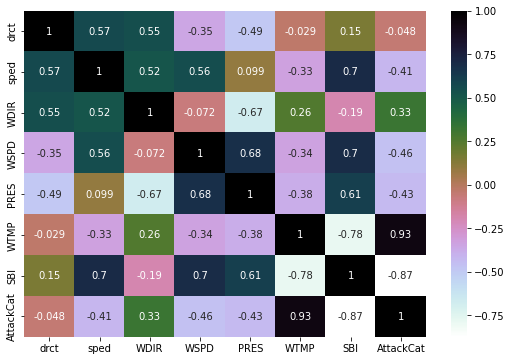

In [22]:
import seaborn as sns

plt.figure(figsize=(9,6))
sns.heatmap(clusters.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [23]:
clusters.corr().AttackCat

drct        -0.048396
sped        -0.414896
WDIR         0.326423
WSPD        -0.462992
PRES        -0.426910
WTMP         0.925958
SBI         -0.873133
AttackCat    1.000000
Name: AttackCat, dtype: float64

We created a visualization to show the variables that were most correlated with **AttackCat**

In [24]:
abs_correlation = abs(clusters.corr().AttackCat)
sorted_cluster = pd.DataFrame(abs_correlation.sort_values(ascending = True))

color_map = []

for x in sorted_cluster.AttackCat:
  if x == 1:
    color_map.append("black")
  elif x >= 0.6:
    color_map.append("darkviolet")
  elif x >= 0.25:
    color_map.append("violet")
  elif x > 0:
    color_map.append("thistle")

<function matplotlib.pyplot.show>

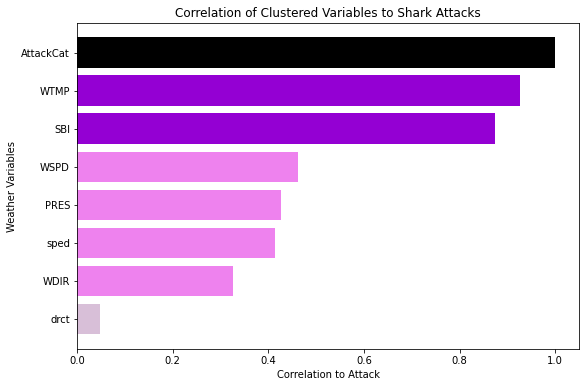

In [25]:
plt.figure(figsize=(9,6))

plt.barh(y = sorted_cluster.index, width = abs_correlation.sort_values(ascending = True), color = color_map)

plt.title("Correlation of Clustered Variables to Shark Attacks")
plt.xlabel("Correlation to Attack")
plt.ylabel("Weather Variables")
#plt.axis
plt.show

The two most notable correlations are **Water Temperature** and **SBI**. The water temperature correlation backs up the data shown by Joe Merchant in his presentation of an increase in shark attacks coinciding with a higher than normal water temperature. Sea Breeze Index has a large correlation at around 0.8. This seems to prove that sea breeze or an environment conducive to sea breeze is a good predictor of the freqeuncy of shark attacks, thus reinforcing our hypothesis.

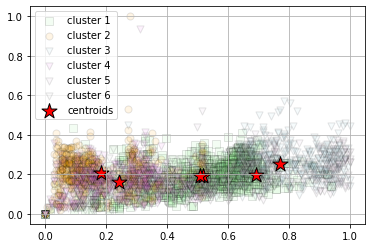

In [26]:
# plot the 6 clusters
X = np.array(normal_data)
plt.scatter(
    X[df_km == 0, 0], X[df_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black', alpha=0.1,
    label='cluster 1'
)

plt.scatter(
    X[df_km == 1, 0], X[df_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black', alpha=0.1,
    label='cluster 2'
)

plt.scatter(
    X[df_km == 2, 0], X[df_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black', alpha=0.1,
    label='cluster 3'
)

plt.scatter(
    X[df_km == 3, 0], X[df_km == 3, 1],
    s=50, c='violet',
    marker='v', edgecolor='black', alpha=0.1,
    label='cluster 4'
)

plt.scatter(
    X[df_km == 4, 0], X[df_km == 4, 1],
    s=50, c='thistle',
    marker='v', edgecolor='black', alpha=0.1,
    label='cluster 5'
)

plt.scatter(
    X[df_km == 5, 0], X[df_km == 5, 1],
    s=50, c='lightgray',
    marker='v', edgecolor='black', alpha=0.1,
    label='cluster 6'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()